# Main Metrics

This notebook:

1) Loads a list of stories and speed metric results as input

2) Computes following ratios and indices

1. signed (%)
2. digital first (0 to 100)
* international (%)
* varied (0 to 100)
* fast (0 to 100)
* mobile speed (0 to 100)

3) Exports data for the selected time frame

For current performance results, mobile_metrics.ipynb and speed_metrics.ipynb need to be run before this notebook.

Feel free to contact me for help: https://www.quel-media.com/about.html#contact

© Paul Ronga under Apache-2 Licence (see LICENCE.txt).

In [99]:
import pandas as pd
import requests
from IPython.display import HTML
import json
from bs4 import BeautifulSoup
import datetime

In [100]:
medias = pd.read_csv('df/media_list.csv', usecols=['media_id', 'Name'])

In [101]:
# 3 and 4 when 7 Aug.: missing speed file
delta_weeks = 0
df = pd.read_csv('df/stories_with_heading.csv', usecols = ['id', 'title', 'absolute_url', 'time_start', 'time_end', 'minutes',
       'delta_str', 'link', 'media', 'media_id', 'story_time', 'agency', 'editor', 'heading', 'domains'])

### Select time frame using date index

In [102]:
# Get and check the last week's time frame

today = datetime.datetime.now()
delta_days = (today.weekday() + 1) % 7
today - datetime.timedelta(7 + delta_days)


last_sunday = today - datetime.timedelta(delta_days)
last_monday = last_sunday - datetime.timedelta(6)
print('Last Sunday should be {}, {} days ago.'.format(last_sunday.strftime('%B %d') , delta_days ))
print('The previous Monday should be {}.'.format(last_monday.strftime('%B %d') , delta_days ))

Last Sunday should be August 19, 3 days ago.
The previous Monday should be August 13.


In [103]:
# For previous weeks

last_monday = last_monday - datetime.timedelta(delta_weeks*7)
last_sunday = last_sunday - datetime.timedelta(delta_weeks*7)
print('Selected Monday is now {}.'.format(last_monday.strftime('%B %d')))
print('Selected Sunday is now {}.'.format(last_sunday.strftime('%B %d')))

Selected Monday is now August 13.
Selected Sunday is now August 19.


In [104]:
# Date index
df['time_start'] = pd.to_datetime(df['time_start'])
df['time_end'] = pd.to_datetime(df['time_end'])
df.index = df['time_start']

In [105]:
start_timestamp = last_monday.strftime('%Y-%m-%d')
end_timestamp = last_sunday.strftime('%Y-%m-%d')
df[start_timestamp:end_timestamp].shape

(956, 15)

In [106]:
df = df[start_timestamp:end_timestamp].copy()

In [107]:
# Check for errors
df[df['link'] != df['link']]

,id,title,absolute_url,time_start,time_end,minutes,delta_str,link,media,media_id,story_time,agency,editor,heading,domains
time_start,,,,,,,,,,,,,,,


In [108]:
df = df[df['link'] == df['link']].copy()
df = df[df['link'] != '#'].copy()

### Get back to numeric index

In [109]:
df.index = df.id

In [110]:
# On retire Konbini Suisse et France et Le Monde
df = df[(df['media_id'] < 34) & (df['media_id'] != 22)].copy()
medias = medias[(medias['media_id'] < 34) & (medias['media_id'] != 22)].copy()

In [114]:
!open .

In [113]:
df[(df['media_id'] == 29) & (df['editor'] == 0)]

,id,title,absolute_url,time_start,time_end,minutes,delta_str,link,media,media_id,story_time,agency,editor,heading,domains
id,,,,,,,,,,,,,,,
24197,24197,Typhon Yagi: 200'000 personnes évacuées en Chine,https://www.lacote.ch/articles/monde/chine-les-autorites-ordonnent-l-evacuation-de-204-949-personnes-a-l-approche-d-un-typhon-776334,2018-08-13 07:24:00,2018-08-13 08:30:00,66,1h06,/articles/monde/chine-les-autorites-ordonnent-l-evacuation-de-204-949-personnes-a-l-approche-d-un-typhon-776334,https://www.lacote.ch/,29,0.0584,0,0,monde,NaN
24209,24209,Pourquoi La Côte échappe à l'avalanche de fruits,https://www.lacote.ch/articles/regions/district-de-nyon/pourquoi-la-cote-echappe-a-la-surabondance-de-fruits-776017,2018-08-13 08:30:00,2018-08-13 11:09:00,159,2h39,/articles/regions/district-de-nyon/pourquoi-la-cote-echappe-a-la-surabondance-de-fruits-776017,https://www.lacote.ch/,29,0.0924,0,0,région,NaN
24225,24225,Nyon: la CGN confie sa mémoire au Musée du Léman,https://www.lacote.ch/articles/regions/district-de-nyon/nyon-la-cgn-confie-sa-memoire-au-musee-du-leman-776363,2018-08-13 11:09:00,2018-08-13 14:00:00,171,2h51,/articles/regions/district-de-nyon/nyon-la-cgn-confie-sa-memoire-au-musee-du-leman-776363,https://www.lacote.ch/,29,0.0740,0,0,région,NaN
24296,24296,Nyon: elle voit son teckel mourir dans ses bras,https://www.lacote.ch/articles/regions/district-de-nyon/nyon-attaque-par-un-berger-hollandais-son-teckel-meurt-dans-ses-bras-775554,2018-08-13 17:06:00,2018-08-13 21:42:00,276,4h36,/articles/regions/district-de-nyon/nyon-attaque-par-un-berger-hollandais-son-teckel-meurt-dans-ses-bras-775554,https://www.lacote.ch/,29,0.0872,0,0,région,NaN
24345,24345,Tennis - Cincinnati: Vögele battue au 1er tour,https://www.lacote.ch/articles/sports/tennis/tennis-cincinnati-vogele-battue-au-premier-tour-apres-avoir-gache-une-balle-de-match-776480,2018-08-13 21:42:00,2018-08-14 06:39:00,537,8h57,/articles/sports/tennis/tennis-cincinnati-vogele-battue-au-premier-tour-apres-avoir-gache-une-balle-de-match-776480,https://www.lacote.ch/,29,0.0730,0,0,sports,NaN
24441,24441,Quand le mythe arthurien se forge dans la région,https://www.lacote.ch/articles/regions/vaud/morges-s-allie-a-vallorbe-pour-forger-le-mythe-arthurien-776447,2018-08-14 12:45:00,2018-08-14 12:48:00,3,3’,/articles/regions/vaud/morges-s-allie-a-vallorbe-pour-forger-le-mythe-arthurien-776447,https://www.lacote.ch/,29,0.0543,0,0,région,NaN
24560,24560,USA: plus de 300 prêtres accusés de pédophilie,https://www.lacote.ch/articles/monde/etats-unis-une-enquete-accuse-300-pretres-de-pedophilie-sur-au-moins-1000-enfants-776712,2018-08-14 21:45:00,2018-08-15 08:12:00,627,10h27,/articles/monde/etats-unis-une-enquete-accuse-300-pretres-de-pedophilie-sur-au-moins-1000-enfants-776712,https://www.lacote.ch/,29,0.0815,0,0,monde,NaN
24637,24637,Les Schumacher sur le point de quitter La Côte?,https://www.lacote.ch/articles/regions/district-de-nyon/apres-plus-de-20-ans-les-schumacher-sont-ils-sur-le-point-de-quitter-la-cote-776805,2018-08-15 14:21:00,2018-08-15 16:33:00,132,2h12,/articles/regions/district-de-nyon/apres-plus-de-20-ans-les-schumacher-sont-ils-sur-le-point-de-quitter-la-cote-776805,https://www.lacote.ch/,29,0.6085,0,0,région,NaN
24670,24670,L'état d'urgence déclaré pour 12 mois à Gênes,https://www.lacote.ch/articles/monde/pont-effondre-a-genes-le-gouvernement-declare-l-etat-d-urgence-pour-douze-mois-a-genes-776892,2018-08-15 18:45:00,2018-08-15 21:33:00,168,2h48,/articles/monde/pont-effondre-a-genes-le-gouvernement-declare-l-etat-d-urgence-pour-douze-mois-a-genes-776892,https://www.lacote.ch/,29,0.0818,0,0,monde,NaN


# 1. “Signed” ratio

In [35]:
def getEditorRatio(_group):
    if len(_group) == 0:
        print('Error: length is 0')
        return False
    print('Editor ratio for {}: {} / {}'.format(_group['media'].values[0], len(_group[_group['editor'] == 1]), len(_group)))
    return len(_group[_group['editor'] == 1]) / len(_group)

In [36]:
# Fix for La Liberté using the story path
for i, row in df[df['media_id'] == 32].iterrows():
    if row['link'].split('/')[1] == 'news-agence':
        df.at[i, 'agency'] = 1
        df.at[i, 'editor'] = 0
    else:
        df.at[i, 'editor'] = 1
        df.at[i, 'agency'] = 0

In [37]:
medias['signed'] = -1
for i, row in medias.iterrows():
    print(i)
    group = df[df['media_id'] == row['media_id']]
    editorRatio = getEditorRatio(group)
    print(editorRatio, round(editorRatio * 100))
    medias.at[i, 'signed'] = round(editorRatio * 100)

0
Editor ratio for https://www.tdg.ch/: 19 / 46
0.41304347826086957 41
1
Editor ratio for https://www.24heures.ch: 33 / 51
0.6470588235294118 65
2
Editor ratio for https://www.letemps.ch: 34 / 83
0.40963855421686746 41
4
Editor ratio for https://www.rts.ch/info/: 0 / 105
0.0 0
5
Editor ratio for https://www.20min.ch/ro/: 14 / 78
0.1794871794871795 18
6
Editor ratio for https://www.lematin.ch/: 26 / 116
0.22413793103448276 22
7
Editor ratio for https://www.mediapart.fr: 12 / 15
0.8 80
8
Editor ratio for https://www.lefigaro.fr/: 23 / 68
0.3382352941176471 34
9
Editor ratio for https://www.liberation.fr/: 35 / 56
0.625 62
10
Editor ratio for https://www.lacote.ch/: 20 / 58
0.3448275862068966 34
11
Editor ratio for https://www.arcinfo.ch/: 20 / 54
0.37037037037037035 37
12
Editor ratio for https://www.lenouvelliste.ch/: 32 / 111
0.2882882882882883 29
13
Editor ratio for https://www.laliberte.ch/: 25 / 38
0.6578947368421053 66
14
Editor ratio for https://lecourrier.ch/: 15 / 15
1.0 100


In [38]:
medias

,media_id,Name,signed
0,19,La Tribune de Genève,41
1,20,24 heures,65
2,21,Le Temps,41
4,23,RTS info,0
5,24,20 minutes (ch),18
6,25,Le Matin,22
7,26,Mediapart,80
8,27,Le Figaro,34
9,28,Libération,62
10,29,La Côte,34


## minutes_day
Ajouter une colonne minutes_day ne comptant que les minutes du jour.
Même principe pour les minutes des heures à fort trafic: 7h-8h, 12h-13h

In [39]:
sevenAM = datetime.time(7, 0)
elevenPM = datetime.time(23, 0)

In [40]:
sevenAM.strftime('%H:%M'), elevenPM.strftime('%H:%M')

('07:00', '23:00')

In [41]:
df['minutes_day'] = 0

In [42]:
# NB changer pour >= et mettre la fin à 23h00?
# Actuellement: fausse les résultats pour un papier publié p.ex. de 23h30 à minuit -> à 23h

sevenAM = datetime.time(7, 0)
elevenPM = datetime.time(23, 0)

for i, row in df.iterrows():
    if row['time_end'] != row['time_end']: # NaT
        continue
    startTime = row['time_start'].time()
    endTime = row['time_end'].time()
    if startTime.hour < 7:
        startTime = sevenAM
    elif startTime.hour > 23:
        startTime = elevenPM
    if endTime.hour < 7:
        endTime = sevenAM
    elif endTime.hour >= 23:
        endTime = elevenPM
        
    startDate = datetime.datetime.combine(row['time_start'].date(), startTime)
    endDate = datetime.datetime.combine(row['time_end'].date(), endTime)
    delta = endDate - startDate
    if delta != 0:
        df.at[i, 'minutes_day'] = round(delta.seconds / 60)
    else:
        df.at[i, 'minutes_day'] = 0

In [43]:
# Check results
df[['time_start', 'time_end', 'minutes', 'minutes_day']]

,time_start,time_end,minutes,minutes_day
id,,,,
24189,2018-08-13 00:03:00,2018-08-13 08:09:00,486,69
24192,2018-08-13 04:12:00,2018-08-13 08:06:00,234,66
24193,2018-08-13 07:00:00,2018-08-13 11:48:00,288,288
24194,2018-08-13 07:03:00,2018-08-13 07:06:00,3,3
24195,2018-08-13 07:06:00,2018-08-13 07:39:00,33,33
24196,2018-08-13 07:06:00,2018-08-13 09:00:00,114,114
24197,2018-08-13 07:24:00,2018-08-13 08:30:00,66,66
24198,2018-08-13 07:24:00,2018-08-13 11:48:00,264,264
24199,2018-08-13 07:24:00,2018-08-13 08:33:00,69,69


In [44]:
# Have a look at some absolute values

targetMedia = 22 # Le Monde

top_headings = df[df['media_id'] == targetMedia]['heading'].value_counts().head(2).index

top_sum = 0
for heading in top_headings:
    results = df[(df['media_id'] == targetMedia) & (df['heading'] == heading)]
    print(heading, len(results), results['minutes'].sum(), results['minutes_day'].sum())
    
    results_day = results[results['minutes_day'] != 0]
    print('Durée moyenne: {} minutes'.format( results_day['minutes_day'].sum() / len(results_day) ))
    
    top_sum += results['minutes_day'].sum()
    
print("Part des deux rubriques principales:", top_sum / df[(df['media_id'] == targetMedia)]['minutes_day'].sum())

Part des deux rubriques principales: nan


/Users/paul/.virtualenvs/dataanalysis/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [45]:
# Absolute values in hours (rounded down)
# All this needs to be refined
for media_id in medias['media_id'].tolist():
    # Heures
    print(medias[medias['media_id'] == media_id]['Name'].values[0])
    heading_times = df[df['media_id'] == media_id].groupby('heading')['minutes_day'].sum()//60
    print(heading_times.sort_values(ascending=False).head(10))

La Tribune de Genève
heading
monde              108
geneve              32
suisse              13
economie             6
culture              1
lematindimanche      0
Name: minutes_day, dtype: int64
24 heures
heading
monde              74
vaud-regions       41
suisse             31
economie            9
lematindimanche     7
culture             1
vivre               0
sports              0
Name: minutes_day, dtype: int64
Le Temps
heading
monde           70
suisse          43
economie        24
culture         11
images           5
societe          4
sciences         3
opinions         2
grand-format     2
sport            0
Name: minutes_day, dtype: int64
RTS info
heading
monde            101
suisse            22
regions           16
economie          12
sciences-tech      7
culture            6
Name: minutes_day, dtype: int64
20 minutes (ch)
heading
monde              80
vaud               22
suisse             20
geneve             15
sports             13
romandie            3
life 

In [46]:
heading_times.std()

17.318445987691028

In [47]:
# Relative values
for media_id in medias['media_id'].tolist():
    # Heures
    theMedia = medias[medias['media_id'] == media_id]
    mediaSum = df[df['media_id'] == media_id]['minutes_day'].sum()
    print(theMedia['Name'].values[0], 'total:', mediaSum)
    heading_times = (round(100 * df[df['media_id'] == media_id].groupby('heading')['minutes_day'].sum() / mediaSum)).to_frame()
    heading_times = heading_times[heading_times['minutes_day'] >= 5].copy()
    print('Dev', round(heading_times['minutes_day'].std()), 'top5',round(heading_times.sort_values('minutes_day', ascending=False).head().std()))
    
    #others = 100 - heading_times[heading_times['minutes_day'] >= 5]['minutes_day'].sum()
    #heading_times.loc['autres'] = {'minutes_day': others}
    #print(heading_times.sort_values('minutes_day', ascending=False).head(2)['minutes_day'].sum())



La Tribune de Genève total: 9792
Dev 31.0 top5 minutes_day    31.0
dtype: float64
24 heures total: 10038
Dev 16.0 top5 minutes_day    16.0
dtype: float64
Le Temps total: 10069
Dev 15.0 top5 minutes_day    15.0
dtype: float64
RTS info total: 10041
Dev 24.0 top5 minutes_day    24.0
dtype: float64
20 minutes (ch) total: 10086
Dev 17.0 top5 minutes_day    17.0
dtype: float64
Le Matin total: 11397
Dev 20.0 top5 minutes_day    20.0
dtype: float64
Mediapart total: 9939
Dev 15.0 top5 minutes_day    15.0
dtype: float64
Le Figaro total: 9981
Dev 33.0 top5 minutes_day    33.0
dtype: float64
Libération total: 10065
Dev 32.0 top5 minutes_day    32.0
dtype: float64
La Côte total: 10047
Dev 15.0 top5 minutes_day    15.0
dtype: float64
Arcinfo total: 10041
Dev 14.0 top5 minutes_day    14.0
dtype: float64
Le Nouvelliste total: 10047
Dev 5.0 top5 minutes_day    4.0
dtype: float64
La Liberté total: 9477
Dev 8.0 top5 minutes_day    8.0
dtype: float64
Le Courrier total: 7041
Dev 15.0 top5 minutes_day    15

In [48]:
heading_times.sort_values('minutes_day', ascending=False).head(2)

,minutes_day
heading,
Genève,43.0
Vaud,26.0


In [49]:
def getVariedRatioByTop(_group):
    heading_times = (round(100 * _group.groupby('heading')['minutes_day'].sum() / _group['minutes_day'].sum())).to_frame()
    
    return 100 - round(heading_times.sort_values('minutes_day', ascending=False).head(2)['minutes_day'].sum())

In [50]:
def getVariedRatioByStd(_group):
    heading_times = (round(100 * _group.groupby('heading')['minutes_day'].sum() / _group['minutes_day'].sum())).to_frame()
    heading_times = heading_times[heading_times['minutes_day'] >= 5].copy()
    
    # print(heading_times.sort_values('minutes_day', ascending=False).head(2)['minutes_day'].sum())
    return 500 / round(heading_times.sort_values('minutes_day', ascending=False).head().std())

In [51]:
medias['varied'] = -1

for i, row in medias.iterrows():
    group = df[df['media_id'] == row['media_id']]
    medias.at[i, 'varied'] = (getVariedRatioByTop(group) + getVariedRatioByStd(group)) / 2

medias

,media_id,Name,signed,varied
0,19,La Tribune de Genève,41,15
1,20,24 heures,65,30
2,21,Le Temps,41,32
4,23,RTS info,0,22
5,24,20 minutes (ch),18,34
6,25,Le Matin,22,27
7,26,Mediapart,80,31
8,27,Le Figaro,34,21
9,28,Libération,62,16
10,29,La Côte,34,29


In [52]:
heading_times['heading'] = heading_times.index

# 3. “international” ratio

In [53]:
df[df['heading'] != df['heading']]

,id,title,absolute_url,time_start,time_end,minutes,delta_str,link,media,media_id,story_time,agency,editor,heading,domains,minutes_day
id,,,,,,,,,,,,,,,,
24814,24814,"Aretha Franklin, respect éternel",http://next.liberation.fr/culture/2018/08/16/a...,2018-08-16 16:12:00,2018-08-16 19:12:00,180,3h00,http://next.liberation.fr/culture/2018/08/16/a...,https://www.liberation.fr/,28,0.0660,0,1,NaN,NaN,180
24884,24884,Toutes les voix d’Aretha,http://next.liberation.fr/musique/2018/08/16/t...,2018-08-16 21:15:00,2018-08-17 07:21:00,606,10h06,http://next.liberation.fr/musique/2018/08/16/t...,https://www.liberation.fr/,28,0.0807,0,1,NaN,NaN,606


In [54]:
df['heading'].fillna('', inplace=True)

In [55]:
df[df['heading'].str.contains('olidarité')]

,id,title,absolute_url,time_start,time_end,minutes,delta_str,link,media,media_id,story_time,agency,editor,heading,domains,minutes_day
id,,,,,,,,,,,,,,,,
24933,24933,«L’Equateur fragilise les femmes»,https://lecourrier.ch/2018/08/16/lequateur-fra...,2018-08-17 09:24:00,2018-08-19 19:00:00,3456,57h36,https://lecourrier.ch/2018/08/16/lequateur-fra...,https://lecourrier.ch/,33,1.5437,0,1,Solidarité,NaN,576


In [56]:
def getInternationalRatio(_group):
    heading_times = (round(100 * _group.groupby('heading')['minutes_day'].sum() / _group['minutes_day'].sum())).to_frame()
    regexp = 'international|monde$'
    if len(_group) > 0:
        print(_group['media_id'].values[0])
#    Solidarité
    # monde$ to avoid “coupe du monde au brésil”
    result = heading_times[heading_times.index.str.contains(regexp, flags=re.IGNORECASE)]
    print(*result.index.tolist())
    return result['minutes_day'].sum()

In [57]:
medias['international'] = -1
import re
for i, row in medias.iterrows():
    group = df[(df['media_id'] == row['media_id'])]  #  & (df['editor'] == 1)
    medias.at[i, 'international'] = getInternationalRatio(group)
medias

19
monde
20
monde
21
monde
23
monde
24
monde
25
monde
26
international
27
international
28
international
29
monde
30
monde
31
monde
32
international
33
International


,media_id,Name,signed,varied,international
0,19,La Tribune de Genève,41,15,66
1,20,24 heures,65,30,45
2,21,Le Temps,41,32,42
4,23,RTS info,0,22,61
5,24,20 minutes (ch),18,34,48
6,25,Le Matin,22,27,53
7,26,Mediapart,80,31,44
8,27,Le Figaro,34,21,65
9,28,Libération,62,16,64
10,29,La Côte,34,29,16


In [58]:
medias['international'] = -1
import re
for i, row in medias.iterrows():
    group = df[(df['media_id'] == row['media_id'])]  #  & (df['editor'] == 1)
    medias.at[i, 'international'] = getInternationalRatio(group)
medias

19
monde
20
monde
21
monde
23
monde
24
monde
25
monde
26
international
27
international
28
international
29
monde
30
monde
31
monde
32
international
33
International


,media_id,Name,signed,varied,international
0,19,La Tribune de Genève,41,15,66
1,20,24 heures,65,30,45
2,21,Le Temps,41,32,42
4,23,RTS info,0,22,61
5,24,20 minutes (ch),18,34,48
6,25,Le Matin,22,27,53
7,26,Mediapart,80,31,44
8,27,Le Figaro,34,21,65
9,28,Libération,62,16,64
10,29,La Côte,34,29,16


# “Digital first” index

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

In [60]:
len(df[(df['media_id'] == 19) & (df['editor'] == 1)])

19

In [61]:
len(df[(df['media_id'] == 25) & (df['editor'] == 1)])

26

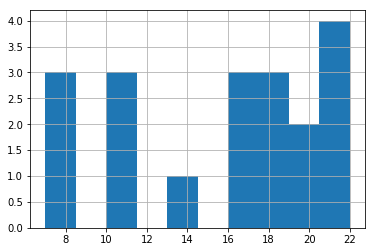

In [62]:
# Tribune de Genève
group = df[(df['media_id'] == 19) & (df['editor'] == 1)]
group['time_start'].dt.hour.hist()

In [63]:
pd.set_option('display.max_colwidth', 500)

In [64]:
df[(df['media_id'] == 25) & (df['editor'] == 1) & (df['time_start'].dt.hour < 16)]['heading'].value_counts()

suisse                 12
economie                2
sports                  2
faits-divers            2
societe                 1
sante-environnement     1
loisirs                 1
Name: heading, dtype: int64

In [65]:
for key, item in df[(df['media_id'] == 25) & (df['editor'] == 1) & (df['time_start'].dt.hour < 16)].sort_index()['absolute_url'].drop_duplicates().to_dict().items():
    print(key, item)

24384 https://www.lematin.ch/suisse/president-pdc-gerhard-pfister-presente-excuses/story/10110831
24385 https://www.lematin.ch/suisse/pascal-couchepin-touche-plein-cur/story/19918478
24613 https://www.lematin.ch/economie/secrets-nouveau-billet-200-francs-reveles/story/31753081
24753 https://www.lematin.ch/faits-divers/fillette-heurtee-passage-pieton-pully/story/25418513
24617 https://www.lematin.ch/suisse/secrets-nouveau-billet-200-francs-reveles/story/31753081
24426 https://www.lematin.ch/faits-divers/sonia-grimm-violee-mari-banc-accuses/story/23367539
24947 https://www.lematin.ch/suisse/nouveau-chapitre-sinistre-histoire-abus-sexuels/story/15421863
24590 https://www.lematin.ch/suisse/accident-genes-estil-possible-suisse/story/28537992
24592 https://www.lematin.ch/economie/bns-presente-nouvelle-billet-200-francs/story/20753411
24401 https://www.lematin.ch/sports/football/italie-pense-trouver-manquait/story/13934849
24274 https://www.lematin.ch/societe/c-jour-gauchers-detre-maladroits/

In [66]:
df.index = df.time_start

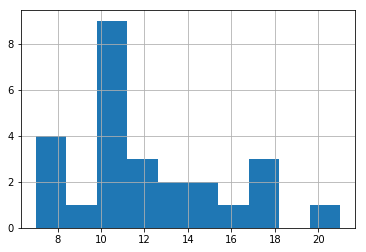

In [67]:
# Le Matin
group = df[(df['media_id'] == 25) & (df['editor'] == 1)]
group['time_start'].dt.hour.hist()

group = group[(group['time_start'].dt.hour > 7) & (group['time_start'].dt.hour < 24) & (group['editor'] == 1)]

if len(group) < 1:
    print('No signed stories found')

morning = group[group.index.hour < 16]
evening = group[group.index.hour >= 16]

In [68]:
int( round( 100 * (len(morning)-3) / len(group) ) )

68

In [69]:
def getDigitalFirstRatio(_group):
    _group = _group[(_group['time_start'].dt.hour > 7) & (_group['time_start'].dt.hour < 24) & (_group['editor'] == 1)]
    
    if len(_group) < 1:
        print('No signed stories found')
        return -1
    
    morning = _group[_group.index.hour < 16]
    evening = _group[_group.index.hour >= 16]
    
    return int( round( 100 * len(morning) / len(_group) ) )

In [70]:
medias['digitalfirst'] = -1

for i, row in medias.iterrows():
    group = df[(df['media_id'] == row['media_id'])]  #  & (df['editor'] == 1)
    medias.at[i, 'digitalfirst'] = getDigitalFirstRatio(group)
medias

No signed stories found


,media_id,Name,signed,varied,international,digitalfirst
0,19,La Tribune de Genève,41,15,66,29
1,20,24 heures,65,30,45,35
2,21,Le Temps,41,32,42,47
4,23,RTS info,0,22,61,-1
5,24,20 minutes (ch),18,34,48,40
6,25,Le Matin,22,27,53,80
7,26,Mediapart,80,31,44,58
8,27,Le Figaro,34,21,65,35
9,28,Libération,62,16,64,45
10,29,La Côte,34,29,16,71


# 5. “Fast” index

In [71]:
# Uncomment this if you just ran speed_metrics and media_metrics
# df_speed = pd.read_csv('df/speed_metrics.csv', usecols=['fully_loaded_time', 'media_id', 'page_load_time',
#       'pagespeed_score', 'report_url'])

In [83]:
# try to find archived metrics
from glob import glob
speed_archives = glob('df/archive/speed_metrics_*')
mobile_archives = glob('df/archive/mobile_metrics_*')

In [84]:
available_days = []
for i in range(0, 7):
    available_days.append( (last_monday + datetime.timedelta(i)).strftime('%Y-%m-%d') )

In [85]:
available_days

['2018-08-13',
 '2018-08-14',
 '2018-08-15',
 '2018-08-16',
 '2018-08-17',
 '2018-08-18',
 '2018-08-19']

In [86]:
speed_file = ''
mobile_file = ''
for file in speed_archives:
    theDate = file.split('_')[-1].replace('.csv', '')
    if theDate in available_days:
        print(theDate, 'is in the week')
        speed_file = file

for file in mobile_archives:
    theDate = file.split('_')[-1].replace('.csv', '')
    if theDate in available_days:
        print(theDate, 'is in the week')
        mobile_file = file

speed_file, mobile_file

2018-08-19 is in the week
2018-08-19 is in the week


('df/archive/speed_metrics_2018-08-19.csv',
 'df/archive/mobile_metrics_2018-08-19.csv')

In [89]:
if speed_file == '':
    raise ValueError('Desktop speed file not found')
if mobile_file == '':
    raise ValueError('Mobile speed file not found')

In [76]:
df_speed = pd.read_csv(speed_file, usecols=['fully_loaded_time', 'media_id', 'page_load_time',
       'pagespeed_score', 'report_url'])

In [77]:
dfm = medias.merge(df_speed, on='media_id')

In [78]:
dfm['fast'] = -1
for i, row in dfm.iterrows():
    # threshold for e-commerce according to Google: 2 seconds
    # let's be very nice and say: 5 seconds
    pageLoadExcess = row['page_load_time'] - 5
    
    # no negative index
    if pageLoadExcess < 0:
        pageLoadExcess = 0

    # Some websites take more than 30 seconds to load. It seems we need to give up using something exponential
    # loadIndex = pow(pageLoadExcess, 1.1)
    
    loadIndex = 5 * pageLoadExcess
    pageLoadRatio = 100 - loadIndex
    if pageLoadRatio < 0:
        pageLoadRatio = 0

    dfm.at[i, 'fast'] = (pageLoadRatio + row['pagespeed_score']*3) / 4
dfm

,media_id,Name,signed,varied,international,digitalfirst,pagespeed_score,page_load_time,fully_loaded_time,report_url,fast
0,19,La Tribune de Genève,41,15,66,29,35,8.844,9.338,https://gtmetrix.com/reports/www.tdg.ch/onH4gjEZ,46
1,20,24 heures,65,30,45,35,32,8.895,9.340,https://gtmetrix.com/reports/www.24heures.ch/Suflmehq,44
2,21,Le Temps,41,32,42,47,49,12.059,12.354,https://gtmetrix.com/reports/www.letemps.ch/Dr2JxWqe,52
3,23,RTS info,0,22,61,-1,56,5.240,5.753,https://gtmetrix.com/reports/www.rts.ch/5hxSVxLB,66
4,24,20 minutes (ch),18,34,48,40,26,9.325,10.232,https://gtmetrix.com/reports/www.20min.ch/O6ejVCIS,39
5,25,Le Matin,22,27,53,80,0,28.521,29.534,https://gtmetrix.com/reports/www.lematin.ch/Lvgv4ZMQ,0
6,26,Mediapart,80,31,44,58,16,4.829,5.289,https://gtmetrix.com/reports/www.mediapart.fr/UbvMgOqg,37
7,27,Le Figaro,34,21,65,35,27,9.036,29.618,https://gtmetrix.com/reports/www.lefigaro.fr/YXzce5Es,40
8,28,Libération,62,16,64,45,3,17.845,25.302,https://gtmetrix.com/reports/www.liberation.fr/imA4MT65,11
9,29,La Côte,34,29,16,71,43,11.296,13.295,https://gtmetrix.com/reports/www.lacote.ch/dUHm33b9,49


In [79]:
dfm

,media_id,Name,signed,varied,international,digitalfirst,pagespeed_score,page_load_time,fully_loaded_time,report_url,fast
0,19,La Tribune de Genève,41,15,66,29,35,8.844,9.338,https://gtmetrix.com/reports/www.tdg.ch/onH4gjEZ,46
1,20,24 heures,65,30,45,35,32,8.895,9.340,https://gtmetrix.com/reports/www.24heures.ch/Suflmehq,44
2,21,Le Temps,41,32,42,47,49,12.059,12.354,https://gtmetrix.com/reports/www.letemps.ch/Dr2JxWqe,52
3,23,RTS info,0,22,61,-1,56,5.240,5.753,https://gtmetrix.com/reports/www.rts.ch/5hxSVxLB,66
4,24,20 minutes (ch),18,34,48,40,26,9.325,10.232,https://gtmetrix.com/reports/www.20min.ch/O6ejVCIS,39
5,25,Le Matin,22,27,53,80,0,28.521,29.534,https://gtmetrix.com/reports/www.lematin.ch/Lvgv4ZMQ,0
6,26,Mediapart,80,31,44,58,16,4.829,5.289,https://gtmetrix.com/reports/www.mediapart.fr/UbvMgOqg,37
7,27,Le Figaro,34,21,65,35,27,9.036,29.618,https://gtmetrix.com/reports/www.lefigaro.fr/YXzce5Es,40
8,28,Libération,62,16,64,45,3,17.845,25.302,https://gtmetrix.com/reports/www.liberation.fr/imA4MT65,11
9,29,La Côte,34,29,16,71,43,11.296,13.295,https://gtmetrix.com/reports/www.lacote.ch/dUHm33b9,49


In [90]:
# Uncomment this if you just ran mobile_metrics
#df_mobile = pd.read_csv('df/mobile_metrics.csv', usecols=['media_id', 'location', 'visualComplete', 'fullyLoaded',
#       'requests', 'report_url', 'mobile_index'])

df_mobile = pd.read_csv(mobile_file, usecols=['media_id', 'location', 'visualComplete', 'fullyLoaded',
       'requests', 'report_url', 'mobile_index'])

In [91]:
dfm = dfm.merge(df_mobile, on='media_id')

In [92]:
outputfile = 'df/archive/media_metrics_{}.csv'.format( last_sunday.strftime('%Y-%m-%d') )
print('Saving archive to {}...'.format(outputfile))

Saving archive to df/archive/media_metrics_2018-08-19.csv...


In [93]:
dfm['Id'] = dfm.index

In [94]:
dfm

,media_id,Name,signed,varied,international,digitalfirst,pagespeed_score,page_load_time,fully_loaded_time,report_url_x,fast,location,visualComplete,fullyLoaded,requests,report_url_y,mobile_index,Id
0,19,La Tribune de Genève,41,15,66,29,35,8.844,9.338,https://gtmetrix.com/reports/www.tdg.ch/onH4gjEZ,46,Dulles_iPhone8:iPhone 8 iOS 11,18730,21305,203,http://www.webpagetest.org/result/180819_7G_40e0416f8e611d41ef1a56b41532986d/,84,0
1,20,24 heures,65,30,45,35,32,8.895,9.340,https://gtmetrix.com/reports/www.24heures.ch/Suflmehq,44,Dulles_iPhone8:iPhone 8 iOS 11,15780,20241,258,http://www.webpagetest.org/result/180819_E6_bd6a8a151975e965b04c3446835502f2/,85,1
2,21,Le Temps,41,32,42,47,49,12.059,12.354,https://gtmetrix.com/reports/www.letemps.ch/Dr2JxWqe,52,Dulles_iPhone8:iPhone 8 iOS 11,7226,15768,162,http://www.webpagetest.org/result/180819_24_6f48b025f8bcb7d9d87aade749e93ecd/,89,2
3,23,RTS info,0,22,61,-1,56,5.240,5.753,https://gtmetrix.com/reports/www.rts.ch/5hxSVxLB,66,Dulles_iPhone8:iPhone 8 iOS 11,8589,11239,133,http://www.webpagetest.org/result/180819_YP_36b925b907419ccd5643e89126e025b1/,94,3
4,24,20 minutes (ch),18,34,48,40,26,9.325,10.232,https://gtmetrix.com/reports/www.20min.ch/O6ejVCIS,39,Dulles_iPhone8:iPhone 8 iOS 11,7875,17240,105,http://www.webpagetest.org/result/180819_QP_88fe0aee159cd1edaf7a1b449010bd30/,88,4
5,25,Le Matin,22,27,53,80,0,28.521,29.534,https://gtmetrix.com/reports/www.lematin.ch/Lvgv4ZMQ,0,Dulles_iPhone8:iPhone 8 iOS 11,19647,35425,235,http://www.webpagetest.org/result/180819_AA_c6bb88cbe92bd36a978e86f56716fa40/,70,5
6,26,Mediapart,80,31,44,58,16,4.829,5.289,https://gtmetrix.com/reports/www.mediapart.fr/UbvMgOqg,37,Dulles_iPhone8:iPhone 8 iOS 11,21469,31501,91,http://www.webpagetest.org/result/180819_NY_66336b62dd4ac3f1648f84b95e23eb1d/,73,6
7,27,Le Figaro,34,21,65,35,27,9.036,29.618,https://gtmetrix.com/reports/www.lefigaro.fr/YXzce5Es,40,Dulles_iPhone8:iPhone 8 iOS 11,14675,33292,292,http://www.webpagetest.org/result/180819_Y2_4c7439202c3b86a5a9e1862890c7694a/,72,7
8,28,Libération,62,16,64,45,3,17.845,25.302,https://gtmetrix.com/reports/www.liberation.fr/imA4MT65,11,Dulles_iPhone8:iPhone 8 iOS 11,5667,17533,172,http://www.webpagetest.org/result/180819_J5_99ccdcc5f581d78771694ae929e809d8/,87,8
9,29,La Côte,34,29,16,71,43,11.296,13.295,https://gtmetrix.com/reports/www.lacote.ch/dUHm33b9,49,Dulles_iPhone8:iPhone 8 iOS 11,12747,27273,163,http://www.webpagetest.org/result/180819_22_8bb3804cf241fde4a0daf126fdcd6cda/,78,9


In [95]:
df[df['media_id'] == 26]['minutes_day'].mean()/60, df[df['media_id'] == 26]['minutes_day'].median()/60

(11.043333333333333, 10.6)

In [96]:
dfm.to_csv('df/media_metrics_{}.csv'.format( last_sunday.strftime('%Y-%m-%d') ) )
dfm.to_csv(outputfile, index=False)

In [97]:
dfm.to_csv('/Users/paul/Sites/quel-media/dashboard/data/media_metrics_{}.csv'.format( last_sunday.strftime('%Y-%m-%d') ) )




In [98]:
outputfile.split('_')[-1]

'2018-08-19.csv'